In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
from sklearn import datasets
df = datasets.load_iris(as_frame=True)
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
df = df.data.join([df.target])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Будем строить логистическую регрессию на основе признаков "sepal length" и "petal length"

Text(0, 0.5, 'length')

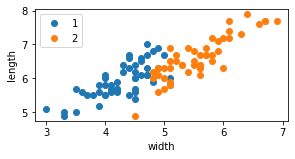

In [21]:
fig = plt.figure(figsize=(10, 7))
plt.subplot(3, 2, 1)
plt.scatter(df.iloc[:, [2]][df.target == 1], df.iloc[:, [0]][df.target == 1], label='1')
plt.scatter(df.iloc[:, [2]][df.target == 2], df.iloc[:, [0]][df.target == 2], label='2')
plt.legend()
plt.xlabel('width')
plt.ylabel('length')

In [22]:
df = df[ df.target != 0 ]
df = df.replace(1, 0).replace(2, 1) #заменим значения на 0 и 1 для построения модели логистической регрессии
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [23]:
Y = df.target.values 
X = df.iloc[:, [0, 2]].values 

In [54]:
def h(B, X):
    ''' значения, предсказанные моделью логистической регрессии '''
    h = []
    for j in range(X.shape[0]):
        L = B[0]
        for i in range(1, X.shape[1]+1):
            L += B[i] * X[j, i-1]
        h.append(1 / (1 + np.exp(-L)))
    return h

In [55]:
def grad(y, B, X):
    ''' градиент '''
    s0 = 0
    for i in range(len(y)):
        s0 -= y[i] - h(B, X)[i]
    grad = [s0]

    for n in range(X.shape[1]):
        s = 0
        for i in range(len(y)):
            s -= X[i, n] * (y[i] - h(B, X)[i])
        grad.append(s)
    return grad

## 1. Градиентный спуск

In [56]:
lr = 0.001
B = np.zeros(np.shape(X)[1]+1)
dt = []
for _ in range(100):
    dt = grad(Y, B, X)
    B[0] -= lr * dt[0]
    for i in range(X.shape[1]):
        B[i+1] -= lr * dt[i+1]

In [57]:
Y_pr = [round(y_pr) for y_pr in h(B, X)]
k = 0
for i in range(len(Y_pr)):
    if Y_pr[i] == Y[i]:
        k += 1
k / len(Y)

0.9

Сравнение с встроенным методом LogisticRegression

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.9333333333333333

## 2. Nesterov momentum

In [58]:
B = np.zeros(np.shape(X)[1]+1)
gamma = 0.9
lr = 0.01
v0 = np.dot(lr, grad(Y, B, X))
v1 = gamma * v0 + np.dot(lr, grad(Y, B - gamma*v0, X)) 
for _ in range(100):
    v0 = v1
    v1 = gamma * v0 + np.dot(lr, grad(Y, B - gamma*v0, X)) 
    B = B - v1

In [59]:
Y_pr = [round(y_pr) for y_pr in h(B, X)]
k = 0
for i in range(len(Y_pr)):
    if Y_pr[i] == Y[i]:
        k += 1
k / len(Y)

0.91

## 3. RMSProp

In [60]:
eps = 10**(-6)
B = np.ones(np.shape(X)[1]+1)
lr = 0.05
E = 0
v = 0
for _ in range(100):
    E = gamma * E + (1 - gamma) * np.array(grad(Y, B, X)) ** 2
    B = B - (lr / np.sqrt(E + eps)) * grad(Y, B, X)  

In [61]:
Y_pr = [round(y_pr) for y_pr in h(B, X)]
k = 0
for i in range(len(Y_pr)):
    if Y_pr[i] == Y[i]:
        k += 1
k / len(Y)

0.91